In [1]:
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')
df.duplicated().sum()

122

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,house,vipul tatvam villa,sector 48,7.25,201388.0,360.0,Plot area 360(33.45 sq.m.),4.0,4.0,3,"pooja room,study room,servant room,store room",2.0,NaN,1 to 5 Year Old,"['Athena', 'Star Mall', 'The Sixth Element School', 'K.R.Mangalam World School', 'Medhaam Pre School & Daycare', 'Peer Baba Ki Mazar', 'HDFC Bank', 'Punjab National Bank', 'Axis Bank', 'Sushil Park', 'CoNexus.Life B35', 'World Tech Park', 'Marriott Courtyard', 'Moksh Wellness Pvt Ltd.', 'Bharat Petroleum Petrol Pump']","['5 Wardrobe', '1 Water Purifier', '4 Fan', '1 Exhaust Fan', '5 Geyser', '9 Light', '1 Modular Kitchen', '6 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
1,flat,imperia the esfera,sector 37c,0.86,4886.0,1760.0,Super Built up area 1760(163.51 sq.m.),3.0,3.0,2,others,0.0,NaN,0 to 1 Year Old,"['Approved Sector 37 Mero Station', 'Esplanade Mall', 'Sector 10 Market', 'Dwarka Expressway', 'Suncity School', 'Xavier’s International', 'Alpine School', 'Signature Hospital']",NaN,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking', 'Security Personnel']"
2,house,independent,sector 40,2.10,23333.0,900.0,Plot area 900(83.61 sq.m.),3.0,3.0,2,others,3.0,North,5 to 10 Year Old,"['Huda city centre metro station', 'Axis bank ATM', 'State bank of india ATM', 'Icici bank ATM', 'Icici ATM', 'Citi bank ATM', 'Axis bank ATM', 'Hdfc ATM', 'Standard chartered ATM', 'Hdfc bank ATM', 'Axis bank ATM', 'Hdfc bank ATM', 'State bank of india ATM', 'Dispencery', 'Shivam Hospital Gurgaon', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Dr. Naval Mendiratta', 'Centre For Sight Gurgaon Sector 29', 'Sukhmani Hospital Pvt. Ltd', 'Ahmed Hospital Multi Speciality', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Medanta', 'Gardian Pharmacy', 'City Medical', 'Gardian Pharmacy', 'Pernod Ricard Charitable Dispensary', 'IBP Petrol Pump', 'Bharat petroleum', 'Hdfc bank', 'Raj Restaurant', 'Fast food', 'Fast Food', 'Om Sweets', 'Bar and restaurant', 'Cafe Coffee Day', '32nd Milestone', 'Darbar', 'PWO house', 'Dhabba', 'St. Angels Jr', 'School of Inspired Leadership SOIL', 'CR Model Public School', 'Manav Rachna School', 'St. Angels Sr', 'Amity Global School', 'Salvan Public School', 'Stones2milestones', 'Manav Rachna Swimming Pool']","['5 Wardrobe', '6 Fan', '1 Exhaust Fan', '7 Geyser', '14 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Water Storage', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']"
3,flat,dlf the ultima,sector 81,2.25,10553.0,2132.0,Super Built up area 2132(198.07 sq.m.),3.0,3.0,3+,servant room,6.0,East,0 to 1 Year Old,"['Huda Metro Station (Gurugram)', 'Vatika Town Square-INXT', 'Manesar Road', 'NH 48', 'Euro International School, Sec 84', 'SGT University', 'Miracles Apollo Cradle Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']","['1 Fridge', '5 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stove', '8 Light', '1 Modular Kitchen', '1 Curtains', '5 AC', '1 Chimney', '5 Wardrobe', '1 Sofa', '1 Microwave', '1 Washing Machine', 'No Bed', 'No Dining Table', 'No TV', 'No Water Puri

In [5]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
1564,1.33,783.0,Built Up area: 1423 (132.2 sq.m.)Carpet area: 783 sq.ft. (72.74 sq.m.)
378,1.25,1423.0,Super Built up area 1423(132.2 sq.m.)
235,1.35,2200.0,Carpet area: 2200 (204.39 sq.m.)
3018,1.55,2191.0,Super Built up area 2191(203.55 sq.m.)Built Up area: 2100 sq.ft. (195.1 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.)
733,1.25,1806.0,Carpet area: 1806 (167.78 sq.m.)


In [6]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    if isinstance(text, float):
        text = str(text)
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [7]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    if isinstance(text, float):
        text = str(text)
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [8]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if isinstance(text, float):
        text = str(text)
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [9]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)


In [10]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
716,2.75,flat,2200.0,Super Built up area 2605(242.01 sq.m.)Built Up area: 2400 sq.ft. (222.97 sq.m.)Carpet area: 2200 sq.ft. (204.39 sq.m.),2605.0,2400.0,2200.0
1125,2.00,house,1337.0,Plot area 1337.4(124.25 sq.m.),NaN,NaN,NaN
613,13.00,house,65261.0,Carpet area: 7250 (6061.92 sq.m.),NaN,NaN,7250.0
3776,19.00,house,4500.0,Plot area 500(418.06 sq.m.),NaN,NaN,NaN
1507,3.69,house,1557.0,Plot area 173(144.65 sq.m.),NaN,NaN,NaN


In [11]:
df.duplicated().sum()

122

In [12]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [13]:
df[df['areaWithType'].str.contains('Plot', na=False)][['price', 'property_type', 'area', 'areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area']].head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,7.25,house,360.0,Plot area 360(33.45 sq.m.),NaN,NaN,NaN
2,2.10,house,900.0,Plot area 900(83.61 sq.m.),NaN,NaN,NaN
4,6.25,house,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 2660 sq.yards (2224.1 sq.m.)Carpet area: 2500 sq.yards (2090.32 sq.m.),NaN,2660.0,2500.0
7,5.60,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
8,9.01,house,5608.0,Plot area 521,NaN,NaN,NaN


In [14]:
df.isnull().sum()

property_type             1
society                   2
sector                    0
price                    19
price_per_sqft           19
area                     19
areaWithType              1
bedRoom                   1
bathroom                  1
balcony                   1
additionalRoom            1
floorNum                 20
facing                 1106
agePossession             2
nearbyLocations         178
furnishDetails          982
features                636
super_built_up_area    1889
built_up_area          2617
carpet_area            1860
dtype: int64

In [15]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,7.25,house,360.0,Plot area 360(33.45 sq.m.),NaN,NaN,NaN
2,2.10,house,900.0,Plot area 900(83.61 sq.m.),NaN,NaN,NaN
7,5.60,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
8,9.01,house,5608.0,Plot area 521,NaN,NaN,NaN
10,1.35,house,3500.0,Plot area 3500(325.16 sq.m.),NaN,NaN,NaN


In [16]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [17]:
# Function to extract plot area
def extract_plot_area(area_with_type):
    if area_with_type is None:
        return None
    area_with_type = str(area_with_type)  # Convert to string
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None


In [18]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)


In [19]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,7.25,house,360.0,Plot area 360(33.45 sq.m.),NaN,360.00,NaN
2,2.10,house,900.0,Plot area 900(83.61 sq.m.),NaN,900.00,NaN
7,5.60,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
8,9.01,house,5608.0,Plot area 521,NaN,521.00,NaN
10,1.35,house,3500.0,Plot area 3500(325.16 sq.m.),NaN,3500.00,NaN
16,16.00,house,4235.0,Plot area 500(418.06 sq.m.),NaN,500.00,NaN
23,8.31,house,3438.0,Plot area 382(319.4 sq.m.),NaN,382.00,NaN
25,5.50,house,1000.0,Plot area 1000(92.9 sq.m.),NaN,1000.00,NaN
45,3.50,house,2610.0,Plot area 290(242.48 sq.m.),NaN,290.00,NaN
53,0.27,house,225.0,Plot area 225(20.9 sq.m.),NaN,225.00,NaN


In [20]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,7.25,house,360.0,Plot area 360(33.45 sq.m.),NaN,360.00,NaN
2,2.10,house,900.0,Plot area 900(83.61 sq.m.),NaN,900.00,NaN
7,5.60,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.00,NaN
8,9.01,house,5608.0,Plot area 521,NaN,5574.70,NaN
10,1.35,house,3500.0,Plot area 3500(325.16 sq.m.),NaN,3500.00,NaN
16,16.00,house,4235.0,Plot area 500(418.06 sq.m.),NaN,500.00,NaN
23,8.31,house,3438.0,Plot area 382(319.4 sq.m.),NaN,3438.00,NaN
25,5.50,house,1000.0,Plot area 1000(92.9 sq.m.),NaN,1000.00,NaN
45,3.50,house,2610.0,Plot area 290(242.48 sq.m.),NaN,2610.00,NaN
53,0.27,house,225.0,Plot area 225(20.9 sq.m.),NaN,225.00,NaN


In [21]:
df.update(all_nan_df)
df.isnull().sum()

property_type             1
society                   2
sector                    0
price                    19
price_per_sqft           19
area                     19
areaWithType              1
bedRoom                   1
bathroom                  1
balcony                   1
additionalRoom            1
floorNum                 20
facing                 1106
agePossession             2
nearbyLocations         178
furnishDetails          982
features                636
super_built_up_area    1889
built_up_area          2071
carpet_area            1860
dtype: int64

In [22]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,house,vipul tatvam villa,sector 48,7.25,201388.0,360.0,Plot area 360(33.45 sq.m.),4.0,4.0,3,"pooja room,study room,servant room,store room",2.0,NaN,1 to 5 Year Old,"['Athena', 'Star Mall', 'The Sixth Element School', 'K.R.Mangalam World School', 'Medhaam Pre School & Daycare', 'Peer Baba Ki Mazar', 'HDFC Bank', 'Punjab National Bank', 'Axis Bank', 'Sushil Park', 'CoNexus.Life B35', 'World Tech Park', 'Marriott Courtyard', 'Moksh Wellness Pvt Ltd.', 'Bharat Petroleum Petrol Pump']","['5 Wardrobe', '1 Water Purifier', '4 Fan', '1 Exhaust Fan', '5 Geyser', '9 Light', '1 Modular Kitchen', '6 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,360.0,NaN
1,flat,imperia the esfera,sector 37c,0.86,4886.0,1760.0,Super Built up area 1760(163.51 sq.m.),3.0,3.0,2,others,0.0,NaN,0 to 1 Year Old,"['Approved Sector 37 Mero Station', 'Esplanade Mall', 'Sector 10 Market', 'Dwarka Expressway', 'Suncity School', 'Xavier’s International', 'Alpine School', 'Signature Hospital']",NaN,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking', 'Security Personnel']",1760.0,NaN,NaN
2,house,independent,sector 40,2.10,23333.0,900.0,Plot area 900(83.61 sq.m.),3.0,3.0,2,others,3.0,North,5 to 10 Year Old,"['Huda city centre metro station', 'Axis bank ATM', 'State bank of india ATM', 'Icici bank ATM', 'Icici ATM', 'Citi bank ATM', 'Axis bank ATM', 'Hdfc ATM', 'Standard chartered ATM', 'Hdfc bank ATM', 'Axis bank ATM', 'Hdfc bank ATM', 'State bank of india ATM', 'Dispencery', 'Shivam Hospital Gurgaon', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Dr. Naval Mendiratta', 'Centre For Sight Gurgaon Sector 29', 'Sukhmani Hospital Pvt. Ltd', 'Ahmed Hospital Multi Speciality', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Medanta', 'Gardian Pharmacy', 'City Medical', 'Gardian Pharmacy', 'Pernod Ricard Charitable Dispensary', 'IBP Petrol Pump', 'Bharat petroleum', 'Hdfc bank', 'Raj Restaurant', 'Fast food', 'Fast Food', 'Om Sweets', 'Bar and restaurant', 'Cafe Coffee Day', '32nd Milestone', 'Darbar', 'PWO house', 'Dhabba', 'St. Angels Jr', 'School of Inspired Leadership SOIL', 'CR Model Public School', 'Manav Rachna School', 'St. Angels Sr', 'Amity Global School', 'Salvan Public School', 'Stones2milestones', 'Manav Rachna Swimming Pool']","['5 Wardrobe', '6 Fan', '1 Exhaust Fan', '7 Geyser', '14 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Water Storage', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']",NaN,900.0,NaN
3,flat,dlf the ultima,sector 81,2.25,10553.0,2132.0,Super Built up area 2132(198.07 sq.m.),3.0,3.0,3+,servant room,6.0,East,0 to 1 Year Old,"['Huda Metro Station (Gurugram)', 'Vatika Town Square-INXT', 'Manesar Road', 'NH 48', 'Euro International School, Sec 84', 'SGT University', 'Miracles Apollo Cradle Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']","['1 Fridge', '5 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stove', '8 Light', '1 Modular Kitchen', '1 Curtains', '5 AC', '1 Chimney', '5 Wardrobe', '1 Sofa',

In [23]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].fillna('').str.contains(col).astype(int)

# Display a sample of the DataFrame with selected columns
print(df.sample(5)[['additionalRoom', 'study room', 'servant room', 'store room', 'pooja room', 'others']])

               additionalRoom  study room  servant room  store room  \
3060  study room,servant room           1             1           0   
600             not available           0             0           0   
2297             servant room           0             1           0   
2036            not available           0             0           0   
2004    pooja room,study room           1             0           0   

      pooja room  others  
3060           0       0  
600            0       0  
2297           0       0  
2036           0       0  
2004           1       0  


In [24]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,house,vipul tatvam villa,sector 48,7.25,201388.0,360.0,Plot area 360(33.45 sq.m.),4.0,4.0,3,"pooja room,study room,servant room,store room",2.0,NaN,1 to 5 Year Old,"['Athena', 'Star Mall', 'The Sixth Element School', 'K.R.Mangalam World School', 'Medhaam Pre School & Daycare', 'Peer Baba Ki Mazar', 'HDFC Bank', 'Punjab National Bank', 'Axis Bank', 'Sushil Park', 'CoNexus.Life B35', 'World Tech Park', 'Marriott Courtyard', 'Moksh Wellness Pvt Ltd.', 'Bharat Petroleum Petrol Pump']","['5 Wardrobe', '1 Water Purifier', '4 Fan', '1 Exhaust Fan', '5 Geyser', '9 Light', '1 Modular Kitchen', '6 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,360.0,NaN,1,1,1,1,0
1,flat,imperia the esfera,sector 37c,0.86,4886.0,1760.0,Super Built up area 1760(163.51 sq.m.),3.0,3.0,2,others,0.0,NaN,0 to 1 Year Old,"['Approved Sector 37 Mero Station', 'Esplanade Mall', 'Sector 10 Market', 'Dwarka Expressway', 'Suncity School', 'Xavier’s International', 'Alpine School', 'Signature Hospital']",NaN,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking', 'Security Personnel']",1760.0,NaN,NaN,0,0,0,0,1
2,house,independent,sector 40,2.10,23333.0,900.0,Plot area 900(83.61 sq.m.),3.0,3.0,2,others,3.0,North,5 to 10 Year Old,"['Huda city centre metro station', 'Axis bank ATM', 'State bank of india ATM', 'Icici bank ATM', 'Icici ATM', 'Citi bank ATM', 'Axis bank ATM', 'Hdfc ATM', 'Standard chartered ATM', 'Hdfc bank ATM', 'Axis bank ATM', 'Hdfc bank ATM', 'State bank of india ATM', 'Dispencery', 'Shivam Hospital Gurgaon', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Dr. Naval Mendiratta', 'Centre For Sight Gurgaon Sector 29', 'Sukhmani Hospital Pvt. Ltd', 'Ahmed Hospital Multi Speciality', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Medanta', 'Gardian Pharmacy', 'City Medical', 'Gardian Pharmacy', 'Pernod Ricard Charitable Dispensary', 'IBP Petrol Pump', 'Bharat petroleum', 'Hdfc bank', 'Raj Restaurant', 'Fast food', 'Fast Food', 'Om Sweets', 'Bar and restaurant', 'Cafe Coffee Day', '32nd Milestone', 'Darbar', 'PWO house', 'Dhabba', 'St. Angels Jr', 'School of Inspired Leadership SOIL', 'CR Model Public School', 'Manav Rachna School', 'St. Angels Sr', 'Amity Global School', 'Salvan Public School', 'Stones2milestones', 'Manav Rachna Swimming Pool']","['5 Wardrobe', '6 Fan', '1 Exhaust Fan', '7 Geyser', '14 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Water Storage', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']",NaN,900.0,NaN,0,0,0,0,1
3,flat,dlf the ultima,sector 81,2.25,10553.0,2132.0,Super Built up area 2132(198.07 sq.m.),3.0,3.0,3+,servant room,6.0,East,0 to 1 Year Old,"['Huda Metro Station (Gurugram)', 'Vatika Town Square-INXT', 'Manesar Road', 'NH 48', 'Euro International School, Sec 84', 'SGT University', 'Miracles Apollo Cradle Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']","['1 Fridge', '5 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stove', '8 Ligh

In [25]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Aug 2023                 7
Jun 2024                 7
Dec 2025                 7
Nov 2023                 5
Oct 2023                 4
By 2025                  4
Jul 2024                 4
Sep 2023                 4
Aug 2024                 4
Jan 2025                 3
May 2024                 3
Nov 2024                 3
Feb 2024                 3
Sep 2025                 2
Oct 2025                 2
Jul 2027                 2
Jan 2026                 2
Dec 2026                 2
Apr 2026                 2
By 2027                  2
Aug 2025                 2
Mar 2025      

In [26]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              334
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [27]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,house,vipul tatvam villa,sector 48,7.25,201388.0,360.0,Plot area 360(33.45 sq.m.),4.0,4.0,3,"pooja room,study room,servant room,store room",2.0,NaN,Relatively New,"['Athena', 'Star Mall', 'The Sixth Element School', 'K.R.Mangalam World School', 'Medhaam Pre School & Daycare', 'Peer Baba Ki Mazar', 'HDFC Bank', 'Punjab National Bank', 'Axis Bank', 'Sushil Park', 'CoNexus.Life B35', 'World Tech Park', 'Marriott Courtyard', 'Moksh Wellness Pvt Ltd.', 'Bharat Petroleum Petrol Pump']","['5 Wardrobe', '1 Water Purifier', '4 Fan', '1 Exhaust Fan', '5 Geyser', '9 Light', '1 Modular Kitchen', '6 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,360.0,NaN,1,1,1,1,0
1,flat,imperia the esfera,sector 37c,0.86,4886.0,1760.0,Super Built up area 1760(163.51 sq.m.),3.0,3.0,2,others,0.0,NaN,New Property,"['Approved Sector 37 Mero Station', 'Esplanade Mall', 'Sector 10 Market', 'Dwarka Expressway', 'Suncity School', 'Xavier’s International', 'Alpine School', 'Signature Hospital']",NaN,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking', 'Security Personnel']",1760.0,NaN,NaN,0,0,0,0,1
2,house,independent,sector 40,2.10,23333.0,900.0,Plot area 900(83.61 sq.m.),3.0,3.0,2,others,3.0,North,Moderately Old,"['Huda city centre metro station', 'Axis bank ATM', 'State bank of india ATM', 'Icici bank ATM', 'Icici ATM', 'Citi bank ATM', 'Axis bank ATM', 'Hdfc ATM', 'Standard chartered ATM', 'Hdfc bank ATM', 'Axis bank ATM', 'Hdfc bank ATM', 'State bank of india ATM', 'Dispencery', 'Shivam Hospital Gurgaon', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Dr. Naval Mendiratta', 'Centre For Sight Gurgaon Sector 29', 'Sukhmani Hospital Pvt. Ltd', 'Ahmed Hospital Multi Speciality', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Medanta', 'Gardian Pharmacy', 'City Medical', 'Gardian Pharmacy', 'Pernod Ricard Charitable Dispensary', 'IBP Petrol Pump', 'Bharat petroleum', 'Hdfc bank', 'Raj Restaurant', 'Fast food', 'Fast Food', 'Om Sweets', 'Bar and restaurant', 'Cafe Coffee Day', '32nd Milestone', 'Darbar', 'PWO house', 'Dhabba', 'St. Angels Jr', 'School of Inspired Leadership SOIL', 'CR Model Public School', 'Manav Rachna School', 'St. Angels Sr', 'Amity Global School', 'Salvan Public School', 'Stones2milestones', 'Manav Rachna Swimming Pool']","['5 Wardrobe', '6 Fan', '1 Exhaust Fan', '7 Geyser', '14 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Water Storage', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']",NaN,900.0,NaN,0,0,0,0,1
3,flat,dlf the ultima,sector 81,2.25,10553.0,2132.0,Super Built up area 2132(198.07 sq.m.),3.0,3.0,3+,servant room,6.0,East,New Property,"['Huda Metro Station (Gurugram)', 'Vatika Town Square-INXT', 'Manesar Road', 'NH 48', 'Euro International School, Sec 84', 'SGT University', 'Miracles Apollo Cradle Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']","['1 Fridge', '5 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stove', '8 Light', '1 Mo

In [28]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
3098,NaN,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'Intercom Facility', 'Water purifier', 'Swimming Pool', 'Security Personnel', 'Maintenance Staff', 'Park', 'Visitor Parking', 'Water Storage', 'Piped-gas', 'Club house / Community Center', 'Fitness Centre / GYM', 'Water softening plant', 'Shopping Centre', 'Rain Water Harvesting']"
2730,"['10 Light', '4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
448,NaN,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1895,NaN,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
1094,[],['Park']


In [29]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]
furnishings_df.shape

(3804, 19)

In [30]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

/var/folders/7w/tfyt6rt124n73xvzq62ryd7m0000gn/T/ipykernel_54934/114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [31]:
furnishings_df.sample(5)

,Water Purifier,Sofa,Fridge,Bed,Microwave,Fan,Washing Machine,Modular Kitchen,Geyser,Exhaust Fan,Wardrobe,Chimney,Curtains,Light,Dining Table,Stove,TV,AC
2602,0,1,0,4,1,5,0,1,2,1,0,1,1,17,0,0,0,4
1955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3311,1,1,1,0,1,2,1,1,1,1,1,1,1,1,1,1,1,0
134,0,0,0,0,0,12,0,0,9,0,0,0,0,17,0,0,0,0


In [32]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [33]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

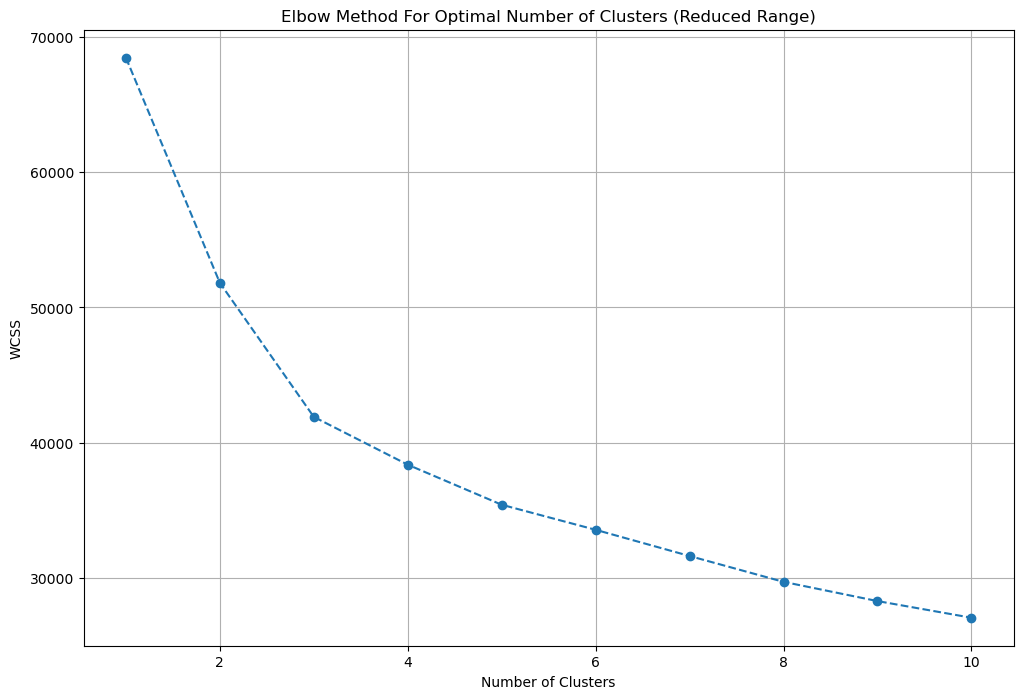

In [34]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [35]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [36]:
df = df.iloc[:,:-18]
df['furnishing_type'] = cluster_assignments
df.sample(5)[['furnishDetails','furnishing_type']]

,furnishDetails,furnishing_type
2426,"['5 Geyser', '7 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",2
3523,[],0
3593,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
2434,NaN,0
1922,"['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0


In [37]:
df[['society','features']].sample(5)

,society,features
2656,bhagwati sadan,NaN
1318,trisara our homes 3,"['Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
90,independent,"['High Ceiling Height', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'Recently Renovated', 'Natural Light', 'Airy Rooms', 'Spacious Interiors']"
2592,independent,"['Maintenance Staff', 'Park', 'Visitor Parking']"
1719,sidhivinayak apartments,"['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


In [38]:
df['features'].isnull().sum()

636

In [39]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)


,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [40]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()
temp_df = df[df['features'].isnull()]
temp_df.shape

(636, 26)

In [41]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']
df.loc[temp_df.index,'features'] = x.values
df['features'].isnull().sum()

482

In [42]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [43]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2750,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2212,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3246,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2713,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
3078,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [44]:
features_binary_df.shape

(3804, 130)

In [45]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

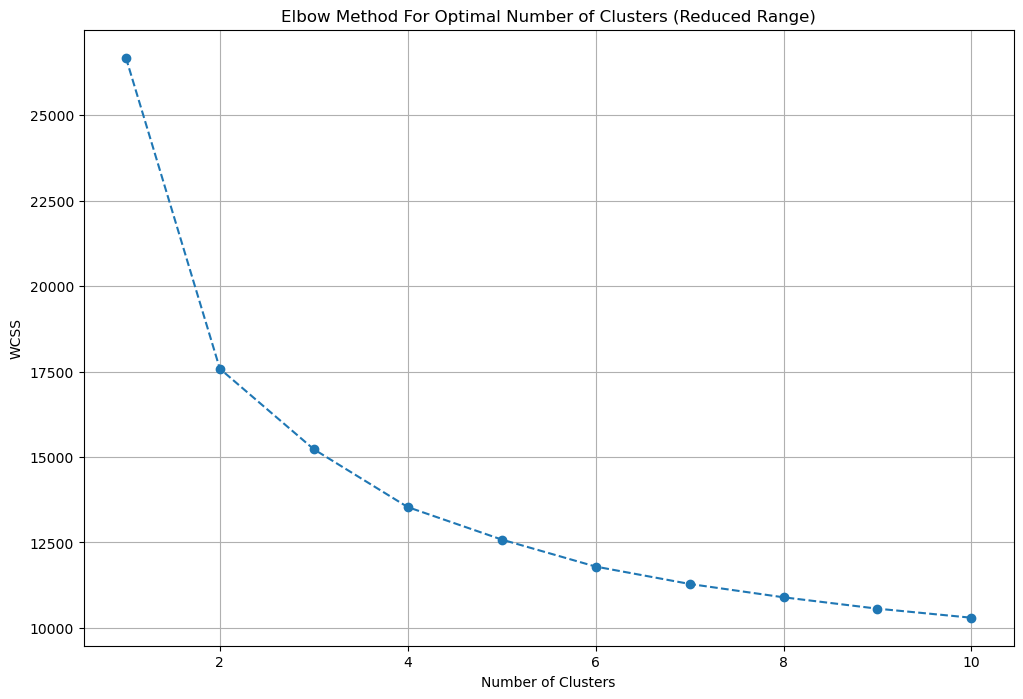

In [46]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [47]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [48]:
df['luxury_score'] = luxury_score
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,house,vipul tatvam villa,sector 48,7.25,201388.0,360.0,Plot area 360(33.45 sq.m.),4.0,4.0,3,"pooja room,study room,servant room,store room",2.0,NaN,Relatively New,"['Athena', 'Star Mall', 'The Sixth Element School', 'K.R.Mangalam World School', 'Medhaam Pre School & Daycare', 'Peer Baba Ki Mazar', 'HDFC Bank', 'Punjab National Bank', 'Axis Bank', 'Sushil Park', 'CoNexus.Life B35', 'World Tech Park', 'Marriott Courtyard', 'Moksh Wellness Pvt Ltd.', 'Bharat Petroleum Petrol Pump']","['5 Wardrobe', '1 Water Purifier', '4 Fan', '1 Exhaust Fan', '5 Geyser', '9 Light', '1 Modular Kitchen', '6 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,360.0,NaN,1,1,1,1,0,2,"[Feng Shui / Vaastu Compliant, Private Garden / Terrace, High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Bank Attached Property, Piped-gas, Visitor Parking, Swimming Pool, Park, Security Personnel, Low Density Society, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center]",103
1,flat,imperia the esfera,sector 37c,0.86,4886.0,1760.0,Super Built up area 1760(163.51 sq.m.),3.0,3.0,2,others,0.0,NaN,New Property,"['Approved Sector 37 Mero Station', 'Esplanade Mall', 'Sector 10 Market', 'Dwarka Expressway', 'Suncity School', 'Xavier’s International', 'Alpine School', 'Signature Hospital']",NaN,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking', 'Security Personnel']",1760.0,NaN,NaN,0,0,0,0,1,0,"[Feng Shui / Vaastu Compliant, Lift(s), Maintenance Staff, Park, Visitor Parking, Security Personnel]",35
2,house,independent,sector 40,2.10,23333.0,900.0,Plot area 900(83.61 sq.m.),3.0,3.0,2,others,3.0,North,Moderately Old,"['Huda city centre metro station', 'Axis bank ATM', 'State bank of india ATM', 'Icici bank ATM', 'Icici ATM', 'Citi bank ATM', 'Axis bank ATM', 'Hdfc ATM', 'Standard chartered ATM', 'Hdfc bank ATM', 'Axis bank ATM', 'Hdfc bank ATM', 'State bank of india ATM', 'Dispencery', 'Shivam Hospital Gurgaon', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Dr. Naval Mendiratta', 'Centre For Sight Gurgaon Sector 29', 'Sukhmani Hospital Pvt. Ltd', 'Ahmed Hospital Multi Speciality', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Medanta', 'Gardian Pharmacy', 'City Medical', 'Gardian Pharmacy', 'Pernod Ricard Charitable Dispensary', 'IBP Petrol Pump', 'Bharat petroleum', 'Hdfc bank', 'Raj Restaurant', 'Fast food', 'Fast Food', 'Om Sweets', 'Bar and restaurant', 'Cafe Coffee Day', '32nd Milestone', 'Darbar', 'PWO house', 'Dhabba', 'St. Angels Jr', 'School of Inspired Leadership SOIL', 'CR Model Public School', 'Manav Rachna School', 'St. Angels Sr', 'Amity Global School', 'Salvan Public School', 'Stones2milestones', 'Manav Rachna Swimming Pool']","['5 Wardrobe', '6 Fan', '1 Exhaust Fan', '7 Geyser', '14 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terr

In [49]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2612,flat,hsiidc sidco shivalik apartments,manesar,0.60,4000.0,1500.0,Super Built up area 1500(139.35 sq.m.)Carpet area: 1077 sq.ft. (100.06 sq.m.),3.0,2.0,2,5.0,South-East,Moderately Old,1500.0,NaN,1077.0,0,0,0,0,0,0,80
276,flat,spaze privy at,sector 84,1.24,6465.0,1918.0,Super Built up area 1918(178.19 sq.m.)Built Up area: 1650 sq.ft. (153.29 sq.m.)Carpet area: 1550 sq.ft. (144 sq.m.),3.0,3.0,3,8.0,North-East,Relatively New,1918.0,1650.0,1550.0,1,0,0,0,0,2,158
3501,flat,tulip violet,sector 69,1.40,8928.0,1568.0,Super Built up area 1568(145.67 sq.m.),3.0,3.0,1,12.0,North,Relatively New,1568.0,NaN,NaN,0,0,0,0,0,0,157
2909,flat,experion the heartsong,sector 108,0.97,9238.0,1050.0,Carpet area: 1050 (97.55 sq.m.),2.0,2.0,3,10.0,North-East,Relatively New,NaN,NaN,1050.0,0,1,0,0,0,0,165
2370,flat,m3m woodshire,sector 107,1.80,7623.0,2361.0,Super Built up area 2361(219.34 sq.m.)Carpet area: 1384 sq.ft. (128.58 sq.m.),3.0,4.0,3+,2.0,NaN,Relatively New,2361.0,NaN,1384.0,0,1,0,0,0,0,129


In [50]:
df.shape

(3804, 23)

In [51]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)